# Stock plotting with yahoo finance

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tickr = yf.Ticker("apha.to")

In [3]:
tickr.info

HTTPError: HTTP Error 404: Not Found

In [ ]:
# get stock info
tickr.info['trailingEps']

In [ ]:
tickr.info['forwardEps']

In [13]:
tickr.info['trailingPE']

KeyError: 'trailingPE'

In [12]:
tickr.info['forwardPE']

-441.75

In [ ]:
tickr.info['dividendRate']

In [ ]:
tickr.info['trailingAnnualDividendYield'] # per share

In [28]:
# get historical market data
hist = tickr.history(period="max")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-12-28,1.60,1.60,1.60,1.60,3000,0,0.0
2011-12-29,1.60,1.60,1.60,1.60,0,0,0.0
2011-12-30,1.60,1.60,1.60,1.60,0,0,0.0
2012-01-03,1.60,1.60,1.60,1.60,0,0,0.0
2012-01-04,1.60,1.60,1.60,1.60,0,0,0.0
...,...,...,...,...,...,...,...
2021-04-06,22.75,22.85,21.59,21.70,2527600,0,0.0
2021-04-07,21.55,21.70,20.35,20.40,3043600,0,0.0
2021-04-08,20.69,20.94,19.78,20.49,2919200,0,0.0


In [174]:
hist.tail(90).index[[0, 10, 20, 30, 40, 50, 60, 70, 80]]

DatetimeIndex(['2020-11-03', '2020-11-17', '2020-12-01', '2020-12-15',
               '2020-12-31', '2021-01-15', '2021-01-29', '2021-02-12',
               '2021-03-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

[0, 29, 58, 87]

In [9]:
hist3M = hist.tail(90)['Close']
hist1Y = hist.tail(365)['Close']
hist.tail(300).index

DatetimeIndex(['2019-08-08', '2019-08-09', '2019-08-12', '2019-08-13',
               '2019-08-14', '2019-08-15', '2019-08-16', '2019-08-19',
               '2019-08-20', '2019-08-21',
               ...
               '2020-10-02', '2020-10-05', '2020-10-06', '2020-10-07',
               '2020-10-08', '2020-10-09', '2020-10-13', '2020-10-14',
               '2020-10-15', '2020-10-16'],
              dtype='datetime64[ns]', name='Date', length=300, freq=None)

In [181]:
hist['tp'] = (hist['High']+hist['Low']+hist['Close'])/3
hist['ma'] = hist['tp'].rolling(20).mean()
hist['stdv'] = hist['tp'].rolling(20).std()
hist['bolu'] = hist['ma'] + ( 2 * hist['stdv'] )
hist['bold'] = hist['ma'] - ( 2 * hist['stdv'] )
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits,tp,ma,stdv,bolu,bold
Date,,,,,,,,,,,,
2011-12-28,1.60,1.60,1.60,1.60,3000,0,0.0,1.600000,NaN,NaN,NaN,NaN
2011-12-29,1.60,1.60,1.60,1.60,0,0,0.0,1.600000,NaN,NaN,NaN,NaN
2011-12-30,1.60,1.60,1.60,1.60,0,0,0.0,1.600000,NaN,NaN,NaN,NaN
2012-01-03,1.60,1.60,1.60,1.60,0,0,0.0,1.600000,NaN,NaN,NaN,NaN
2012-01-04,1.60,1.60,1.60,1.60,0,0,0.0,1.600000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-08,19.79,21.15,19.11,20.46,4822700,0,0.0,20.240000,24.355667,3.185104,30.725876,17.985458
2021-03-09,21.04,23.10,21.00,22.90,5608400,0,0.0,22.333333,24.304167,3.210222,30.724611,17.883723
2021-03-10,24.27,24.62,21.75,22.38,5803800,0,0.0,22.916667,24.011000,3.043354,30.097709,17.924291


## Plotting

In [ ]:
[x for x in range(0,89,89//3)]

In [30]:
price_now = hist.tail()
num = len(hist)
val = (price_now/hist.at(len(hist)-num)) * 100

TypeError: '_AtIndexer' object is not callable

In [185]:
fig,ax=plt.plot(hist.index, hist['tp'].values, hist['ma'].values)
#     plt.title(f"{tickr.info['symbol']} Stock History")
plt.ylabel('Close Price')
plt.xlabel('Year')
#     ax.set_xticks(hist.index[[x for x in range(0, len(self.hist), len(self.hist)//3)]])
plt.show()

ValueError: view limit minimum -36873.1 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

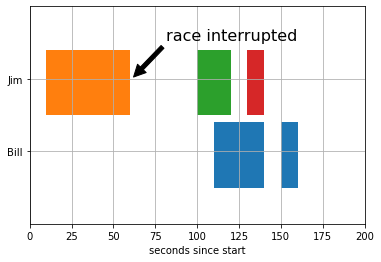

In [10]:
fig, ax = plt.subplots()
ax.broken_barh([(110, 30), (150, 10)], (10, 9), facecolors='tab:blue')
ax.broken_barh([(10, 50), (100, 20), (130, 10)], (20, 9),
               facecolors=('tab:orange', 'tab:green', 'tab:red'))
ax.set_ylim(5, 35)
ax.set_xlim(0, 200)
ax.set_xlabel('seconds since start')
ax.set_yticks([15, 25])
ax.set_yticklabels(['Bill', 'Jim'])
ax.grid(True)
ax.annotate('race interrupted', (61, 25),
            xytext=(0.8, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=16,
            horizontalalignment='right', verticalalignment='top')

plt.show()

## more yfinance object members

In [42]:
type(hist)

pandas.core.frame.DataFrame

In [7]:
# show actions (dividends, splits)
tickr.actions

,Dividends,Stock Splits
Date,,
1987-09-21,0.00,2.0
1990-04-16,0.00,2.0
1991-06-27,0.00,1.5
1992-06-15,0.00,1.5
1994-05-23,0.00,2.0
...,...,...
2019-05-15,0.46,0.0
2019-08-14,0.46,0.0
2019-11-20,0.51,0.0


In [8]:
# show dividends
tickr.dividends

Date
2003-02-19    0.08
2003-10-15    0.16
2004-08-23    0.08
2004-11-15    3.08
2005-02-15    0.08
              ... 
2019-05-15    0.46
2019-08-14    0.46
2019-11-20    0.51
2020-02-19    0.51
2020-05-20    0.51
Name: Dividends, Length: 66, dtype: float64

In [9]:
# show splits
tickr.splits

Date
1987-09-21    2.0
1990-04-16    2.0
1991-06-27    1.5
1992-06-15    1.5
1994-05-23    2.0
1996-12-09    2.0
1998-02-23    2.0
1999-03-29    2.0
2003-02-18    2.0
Name: Stock Splits, dtype: float64

In [13]:
# show financials
tickr.financials


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [14]:
tickr.quarterly_financials

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [ ]:
# show major holders
tickr.major_holders

In [17]:
# show institutional holders
tickr.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",640172572,2020-03-30,0.0844,100961616330
1,Blackrock Inc.,517578906,2020-03-30,0.0683,81627369265
2,State Street Corporation,314771248,2020-03-30,0.0415,49642573522
3,"FMR, LLC",237892832,2020-03-30,0.0314,37518078534
4,Price (T.Rowe) Associates Inc,172056401,2020-03-30,0.0227,27135015001
5,Capital World Investors,139116236,2020-03-30,0.0183,21940021579
6,"Geode Capital Management, LLC",115684966,2020-03-30,0.0153,18244675987
7,Capital International Investors,103523946,2020-03-30,0.0137,16326761523
8,Capital Research Global Investors,93247848,2020-03-30,0.0123,14706118108
9,Northern Trust Corporation,92119080,2020-03-30,0.0121,14528100106


In [18]:
# show balance heet
tickr.balance_sheet

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [19]:
    tickr.quarterly_balance_sheet

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [20]:
# show cashflow
tickr.cashflow

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [21]:
tickr.quarterly_cashflow

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [22]:
# show earnings
tickr.earnings

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [23]:
tickr.quarterly_earnings

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [24]:
# show sustainability
tickr.sustainability

,Value
2020-3,
palmOil,False
controversialWeapons,False
gambling,False
socialScore,9.87
nuclear,False
furLeather,False
alcoholic,False
gmo,False
catholic,False


In [25]:
# show analysts recommendations
tickr.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2012-03-16 08:19:00,Argus Research,Buy,,up
2012-03-19 14:00:00,Hilliard Lyons,Long-Term Buy,,main
2012-03-22 07:03:00,Morgan Stanley,Overweight,,main
2012-04-03 11:53:00,UBS,Buy,,main
2012-04-20 06:18:00,Deutsche Bank,Buy,,main
...,...,...,...,...
2020-04-30 14:21:15,BMO Capital,Outperform,,main
2020-04-30 15:47:20,Wells Fargo,Overweight,,main
2020-05-18 13:45:46,RBC Capital,Outperform,,reit


In [26]:
# show next event (earnings, etc)
tickr.calendar

,0,1
Earnings Date,2020-07-16 00:00:00,2020-07-20 00:00:00
Earnings Average,1.39,1.39
Earnings Low,1.32,1.32
Earnings High,1.51,1.51
Revenue Average,36491800000,36491800000
Revenue Low,36053000000,36053000000
Revenue High,37098000000,37098000000


In [27]:
# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
tickr.isin

'US5949181045'

In [28]:
# show options expirations
tickr.options

('2020-07-01',
 '2020-07-09',
 '2020-07-16',
 '2020-07-23',
 '2020-07-30',
 '2020-08-06',
 '2020-08-20',
 '2020-09-17',
 '2020-10-15',
 '2020-11-19',
 '2020-12-17',
 '2021-01-14',
 '2021-03-18',
 '2021-06-17',
 '2021-09-16',
 '2022-01-20',
 '2022-03-17',
 '2022-06-16',
 '2022-09-15')

In [38]:
# get option chain for specific expiration
opt = tickr.option_chain('2020-07-01')
opt
# data available via: opt.calls, opt.puts

Options(calls=         contractSymbol       lastTradeDate  strike  lastPrice  bid  ask  \
0   MSFT200702C00150000 2020-06-26 19:54:20   150.0      47.30  0.0  0.0   
1   MSFT200702C00155000 2020-06-26 16:42:29   155.0      41.70  0.0  0.0   
2   MSFT200702C00157500 2020-06-25 13:53:55   157.5      39.25  0.0  0.0   
3   MSFT200702C00160000 2020-06-26 15:01:21   160.0      36.22  0.0  0.0   
4   MSFT200702C00162500 2020-06-26 15:05:57   162.5      34.50  0.0  0.0   
5   MSFT200702C00165000 2020-06-26 18:50:38   165.0      32.28  0.0  0.0   
6   MSFT200702C00167500 2020-06-26 17:05:46   167.5      30.45  0.0  0.0   
7   MSFT200702C00170000 2020-06-26 15:46:36   170.0      28.10  0.0  0.0   
8   MSFT200702C00172500 2020-06-25 16:32:05   172.5      25.95  0.0  0.0   
9   MSFT200702C00175000 2020-06-26 19:47:42   175.0      23.25  0.0  0.0   
10  MSFT200702C00177500 2020-06-26 17:04:01   177.5      20.38  0.0  0.0   
11  MSFT200702C00180000 2020-06-26 19:56:00   180.0      17.40  0.0  0.0  

## String manip and other testing 

In [35]:
entry = [6.12, 2.32, 118.26, 22.28, 66.37, 33.95, 32.50, 16.95, 21.07, 149.81]
exit = [ x*4 for x in entry]
exit

[24.48, 9.28, 473.04, 89.12, 265.48, 135.8, 130.0, 67.8, 84.28, 599.24]

In [13]:
s = 'wow'
print(s.swapcase())

WOW


In [9]:
3//5 # integer division

0

In [12]:
# create dictionary from two lists
l1 = ['a',1,"who"]
l2 = [1,2,3,4]
dict(zip(l1,l2))

{'a': 1, 1: 2, 'who': 3}

In [14]:
# A Python program to print all 
# permutations using library function 
from itertools import permutations 
  
# Get all permutations of [1, 2, 3] 
perm = permutations([1, 2, 3]) 
  
# Print the obtained permutations 
for i in list(perm): 
    print (i) 

3

In [15]:
c = [1,2,3,len(l1)]

In [40]:
c

[1, 2, 3, 3]

In [3]:
# [x for x in c if x != 1]
n = 10
[i for i in range(1,n+1) if n%i == 0]

[1, 2, 5, 10]

In [21]:
nm = input().split(' ')
m = nm[1]
n = nm[0]

['2', '3']

In [24]:
if '2' in nm:
    print('yup')

yup


In [39]:
a=map(int, input().split())
m,n =list(a)
type(m)

1 2


int

In [11]:
a = (map(int,input()))
a

1


In [42]:
n= int(input())
a = []
for i in range(0,n):
    a.append(list(map(int,input().split())))

3
1 1 1
1 1 1
1 1 1


In [83]:
while 1:
    a=input()
    if a=='':
        break
    print(a)
    

a
a
gvbhgvh
gvbhgvh



In [81]:
maxr,maxri = [0,0]

In [1]:
import datetime

In [9]:
a = datetime.datetime.now()
for i in range(5): 
    a += datetime.timedelta(days=1)
str(a)

'2021-04-30 22:48:26.383642'

In [64]:
f = open("info.txt", "w")
f.write(str(datetime.datetime.now()))
f.close()

In [60]:
str(datetime.datetime.now())

'2021-03-01 00:15:34.205158'

In [90]:
s='12334435679'
for c in s[1:len(s)-1]:
    print(c)

2
3
3
4
4
3
5
6
7


In [103]:
count=0
maxcount=0
for x in bin(439)[2::]:
    #print(x)
    if x == '1':
        count+=1
        if count>maxcount:
            maxcount=count
    elif x == '0':
        count = 0
print(maxcount)

3


In [102]:
bin(439) #decimal to binary

'0b110110111'

In [4]:
set(['23', 'fds'])

{'23', 'fds'}

In [106]:
import requests
ip="104.200.132.109"  # get location from ip
response = requests.get(f"https://geolocation-db.com/json/{ip}&position=true").json()
response

{'country_code': 'CA',
 'country_name': 'Canada',
 'city': 'Vancouver',
 'postal': 'V6E',
 'latitude': 49.2833,
 'longitude': -123.1298,
 'IPv4': '104.200.132.109',
 'state': 'British Columbia'}

In [122]:
s1 = set([1,2,3,4,5,6,7,8,9])
print(s1)
s2 = set(map(int,"10 1 2 3 11 21 55 6 8".split()))
print(s2)
s2=s2.union(s1)
print(len(s2))
s1

{1, 2, 3, 4, 5, 6, 7, 8, 9}
{1, 2, 3, 6, 8, 10, 11, 21, 55}
13


{1, 2, 3, 4, 5, 6, 7, 8, 9}

In [132]:
grid = ['1112', '1912', '1892', '1234']
grid[1].replace(grid[1][1],'X')

'1X12'

In [23]:
a = (1,2)
type(a)

tuple

In [146]:
i=ord('s')
i

115

In [26]:
df = pd.DataFrame(columns=['a', 'b', 'c'])
df = df.append(
pd.Series(['s',1,(1,2)], index=['a', 'b', 'c']),
ignore_index=True)
df

,a,b,c
0,s,1,"(1, 2)"


In [27]:
positions = {'symbol':['apha.to', 'gold.to', 'wmt', 'ac.to', 'l.to', 'cgx.to', 'vcn.to', 'xei.to', 'xqb.to', 'huv.to'], 'entry': 'n/a'}
df = pd.DataFrame.from_dict(positions)
df

,symbol,entry
0,apha.to,n/a
1,gold.to,n/a
2,wmt,n/a
3,ac.to,n/a
4,l.to,n/a
5,cgx.to,n/a
6,vcn.to,n/a
7,xei.to,n/a
8,xqb.to,n/a
9,huv.to,n/a
